# HW2: Pedro Armengol

# 1) Import Packages and Read CSV

In [75]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import plotly.plotly as py  # tools to communicate with Plotly's server
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

%matplotlib inline

path = "/Users/Usuario/Documents/Chicago/CS_ML/HW2/Data/"
data = "credit-data.csv"

In [4]:
credit_df = pd.read_csv(path+data)

## 2) DESCRIPTIVE STATISTICS

In [5]:
list(credit_df)
credit_df.count()

PersonID                                150000
SeriousDlqin2yrs                        150000
RevolvingUtilizationOfUnsecuredLines    150000
age                                     150000
zipcode                                 150000
NumberOfTime30-59DaysPastDueNotWorse    150000
DebtRatio                               150000
MonthlyIncome                           120269
NumberOfOpenCreditLinesAndLoans         150000
NumberOfTimes90DaysLate                 150000
NumberRealEstateLoansOrLines            150000
NumberOfTime60-89DaysPastDueNotWorse    150000
NumberOfDependents                      146076
dtype: int64

The database have 150,000 observations, where every observation is a creditholder. Some variables have missing values: NA (for example, MonthlyIncome has almost 3,000 NA's). There would be neccesary a data imputation mechanism in order to build a balace dataframe for the predictions.

## Table of Means


In [6]:
table_means = credit_df.groupby(["SeriousDlqin2yrs"])["RevolvingUtilizationOfUnsecuredLines","age","DebtRatio","MonthlyIncome","NumberOfOpenCreditLinesAndLoans","NumberOfDependents"].mean()
table_means

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfDependents
SeriousDlqin2yrs,,,,,,
0,6.168855,52.751375,357.151168,6747.837774,8.493620,0.743417
1,4.367282,45.926591,295.121066,5630.826493,7.882306,0.948208


In this table, we show the difference in means between the people that experienced financial distress and (Serious Dlqin2yrs == 1) and the ones that not. In general, the people that experienced financial distress have relatively less revolving utilization of unsecured lines. This group is relatively younger, have a smaller debt ration (that is reasonable given less access to loans) and, also, a smaller monthly income. In the same direction, the number of open credits of the "financial distress" group is smaller and the other group. The number of dependants is higher in the "financial distress" group as well. 

## Correlation Matrix

In [7]:
credit_df.corr()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
PersonID,1.000000,0.002801,0.002372,0.004403,-0.002721,-0.000571,-0.002906,0.002632,0.004586,-0.001104,-0.000666,-0.000777,-0.000055
SeriousDlqin2yrs,0.002801,1.000000,-0.001802,-0.115386,0.005103,0.125587,-0.007602,-0.019746,-0.029669,0.117175,-0.007038,0.102261,0.046048
RevolvingUtilizationOfUnsecuredLines,0.002372,-0.001802,1.000000,-0.005898,-0.003571,-0.001314,0.003961,0.007124,-0.011281,-0.001061,0.006235,-0.001048,0.001557
age,0.004403,-0.115386,-0.005898,1.000000,0.002590,-0.062995,0.024188,0.037717,0.147705,-0.061005,0.033150,-0.057159,-0.213303
zipcode,-0.002721,0.005103,-0.003571,0.002590,1.000000,0.007429,0.001458,0.002070,-0.003609,0.007543,-0.001345,0.007619,-0.003511
NumberOfTime30-59DaysPastDueNotWorse,-0.000571,0.125587,-0.001314,-0.062995,0.007429,1.000000,-0.006542,-0.010217,-0.055312,0.983603,-0.030565,0.987005,-0.002680
DebtRatio,-0.002906,-0.007602,0.003961,0.024188,0.001458,-0.006542,1.000000,-0.028712,0.049565,-0.008320,0.120046,-0.007533,-0.040673
MonthlyIncome,0.002632,-0.019746,0.007124,0.037717,0.002070,-0.010217,-0.028712,1.000000,0.091455,-0.012743,0.124959,-0.011116,0.062647
NumberOfOpenCreditLinesAndLoans,0.004586,-0.029669,-0.011281,0.147705,-0.003609,-0.055312,0.049565,0.091455,1.000000,-0.079984,0.433959,-0.071077,0.065322
NumberOfTimes90DaysLate,-0.001104,0.117175,-0.001061,-0.061005,0.007543,0.983603,-0.008320,-0.012743,-0.079984,1.000000,-0.045205,0.992796,-0.010176


Running a correlation matrix is easy to see that there are not strong correlations (negative nor positive) between our variable of interest (SeriousDlqin2yr) under the standar parameter $p > .6$. However, given that SeriousDlqin2yr is a dummy, some correlations are worth to note: first there is a negative correlation between age and propensity to suffer "financial distress". Second, there is a positive correlation between financial distress and NumberOfTime60-89DaysPastDueNotWorse, NumberOfTimes90DaysLate and NumberOfTime60-89DaysPastDueNotWorse. In other words, sort term loans neglections are positively asociated to long term (2 years) financial distress.




### Histograms of Key Variables

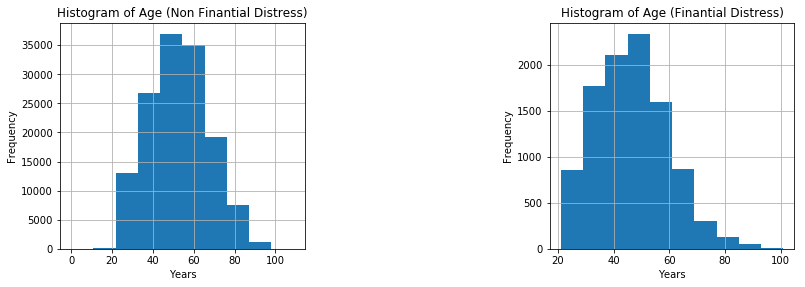

In [99]:
# histogram of education
plt.figure(1)

plt.subplot(221)
plt.title('Histogram of Age (Non Finantial Distress)')
credit_df.age[credit_df["SeriousDlqin2yrs"] == 0].hist()
plt.xlabel('Years')
plt.ylabel('Frequency')

plt.subplot(222)
plt.title('Histogram of Age (Finantial Distress)')
credit_df.age[credit_df["SeriousDlqin2yrs"] == 1].hist()
plt.xlabel('Years')
plt.ylabel('Frequency')

plt.subplots_adjust(top=4, bottom=0.08, left=0.30, right=2.0, hspace=3.0,wspace=1.0)
plt.show()




The age distribution of the people with "financial distress" is more positive swed that the people without it. In other words, the biggest chunk of people with "financial distress" is concentrated in early ages,  with a relative small incidence of cases beyond the $60$ years old.

In [125]:
credit_df["monthly_categ"] = pd.qcut(credit_df["MonthlyIncome"], 5, labels=["Very Low","Low","Middle","Middle High","Very High"])

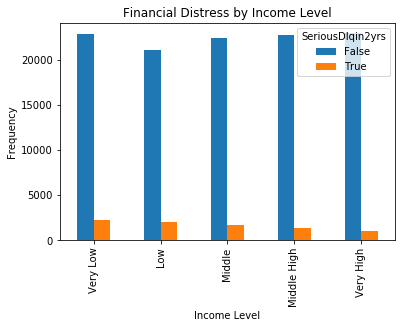

In [126]:
# barplot of marriage rating grouped by affair (True or False)
pd.crosstab(credit_df.monthly_categ, credit_df.SeriousDlqin2yrs.astype(bool)).plot(kind='bar')
plt.title('Financial Distress by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Frequency')


In the previous graph, there can be observe an slighly trend to suffer less Financial Distress at higher income levels. 

## 3) Pre - Process Data

In [122]:
#Read again the dataframe
credit_df = pd.read_csv(path+data)

In [8]:

def filling_missing(df):
    '''
    Receive a data frame with missing values and return a data frame without missing values
    Input:s
        Data frame with Nan's
    Output:
        Data frame without Nan's
    
    '''
    
    df = df.fillna(df.mean())
    
    return df
    

In [9]:
credit_df = filling_missing(credit_df)



## 4) Generate Features/Predictors

In [10]:
def categorize_continuos(var,bins,df):

    '''
    Receive a continuos variable and discretaize it. After, the variable is merge with the database of interest.
    Input:
        var: string (variable name)
        bins: int (number of cuts in the variable)
        df: dataframe (where the continuos variable is located and where the discrete variable will be merge)
    Output:
        df: dataframe (with the categorical variable)
    
    '''
    df["{0}_categ".format(var)] = pd.cut(df[var],bins)
    
    return df

def categorical_dummy(var,df):

    '''
    Receive a categorical variable and convert it into several dummies (one for each category). After, the dummies are merge 
    with the databse of interest
    Input:
        variable: Data frame column (categorical variable)
        df: dataframe      
    Output:
        df: dataframe (with the dummy variables)
        
    '''
    dummies = pd.get_dummies(df[var])
    
    n = 0
    for i in dummies:
        n += 1
        name = "dummy{0}{1}".format(var,n)
        dummies = dummies.rename(columns = {i:name})
    
    df = df.merge(dummies, left_index = True, right_index = True)   
    
    return df




### Processing Data before classification




In [11]:
list_cov = ["age", "NumberOfTime30-59DaysPastDueNotWorse", "NumberOfTimes90DaysLate","NumberOfTime60-89DaysPastDueNotWorse"]

We will build the model just with the 4 variables that have the higher correlation coeficient (in absolute value) with our variable to predict (SeriousDlqin2yrs). However, monthly income will be added to that list given the importance that previous literature fund between "financial distress" and income.


In [12]:
list_cov

['age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberOfTime60-89DaysPastDueNotWorse']

##### This loop will create categorical variables for the covariates on the previous list and dummies for each categorie, then will refresh the data frame with the just created predictors


In [19]:
for i in list_cov:
    credit_df = categorize_continuos(i,10,credit_df)
    credit_df = categorical_dummy(i, credit_df)


### Delimit X and Y

In [33]:
list_covariates = []
for i in credit_df:
    if "dummy" in i:
        list_covariates.append(i)

y = credit_df["SeriousDlqin2yrs"]
X = credit_df[list_covariates]

## 5) Build Classifier


### Whole sample estimation

We Run a logistic regression model with $SeriousDlqin2yrs$ as the depedent variables and the dummies of the section "Processing Data before classification" as indepent variables.

In [40]:
model1 = LogisticRegression()
model1 = model1.fit(X, y)


## 6) Evaluate Classifier

### Baseline estimation 

In [266]:
y.mean()


0.06684

In [28]:
1-0.06684

0.93316

Which would be our efficiency of a simple and "naive" model? For example, predicting just SeriousDlqin2yrs == 0? Would accert $93.31$ percent of the cases (we have a very low prevalence of "financial distress" in the sample). So, our model has to predict with more than 93.31 percent of accuracy in order to beat the baseline estimation.


In [36]:
model1.score(X, y)

0.93642000000000003

In [43]:
((0.9364-0.93316)/0.93316)*100

0.3472073385057247

Here, we check the accuracy on the training set (number of cases correctly predicted over the total number of cases in the sample). Although, we are predicting $93.64$ of the cases correctly our model perform just slightly better than the baseline estimation. Actually, our model just predict $0.34$ percent better than the baseline model.

### Splitting the test into training and testing test to check for robustness

In this section, we will split the data into two different sections: training and testing. The first section is going to fit the model with $70$ percent of the data. The second section, $30$ percent of the data, is going to be used to predict "financial distress". The idea is to test if the model is not overfitted in the previous exercise (bringing non-realistic accuracy metrics).

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
model2.score(X_test, y_test)

0.93548888888888893

Over here, we are fitting the model to the testing section of the data. The outcome is very similar to the previous exercise: the out of sample prediction is of $93.54$ percent of accuracy.

## Conclusion

In this exercise, we did some descriptive statistics about the age and income levels of the persons that suffer financial distress and those that don't. Also, applying simple functions based on pandas, we process the dataset (fill missing values, categorize variables and so on). We run a logistic regresion model to predict financial distress and compare some accuracy metrics between our predictions and the predictions of a baseline model. Finally, our model did slightly better job that the baseline but almost imperceptible.
